In [11]:
%matplotlib inline
import pennylane as qml
import numpy as np
import pennylane.numpy as pnp
import jax
import jax.numpy as jnp
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from qiskit.providers.aer.noise import NoiseModel
import types
import qiskit
from functools import partial
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.labelsize'] = 15

### Configuration

In [2]:
with open('IBMQ_token.txt', 'r') as f:
    TOKEN = f.read().strip()
provider = qiskit.IBMQ.enable_account(TOKEN)

In [12]:
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)  # use this line to simulate device noise
# noise_model = None  # use this line for no device noise

num_qubits, num_layers = 4, 2
shotlist= [1000, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5]

noisy_device0 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[0],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device1 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[1],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device2 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[2],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device3 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[3],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device4 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[4],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device5 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[5],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device6 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[6],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device7 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[7],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device8 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[8],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device9 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[9],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device10 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[10],
    backend='aer_simulator_statevector',
    noise_model=noise_model)
noisy_device11 = qml.device(
    'qiskit.aer',
    wires=num_qubits,
    shots=shotlist[11],
    backend='aer_simulator_statevector',
    noise_model=noise_model)


ideal_device = qml.device(
    'default.qubit.jax',
    wires=num_qubits)

### Build a simple circuit and a loss function

In [13]:
def circuit(parameters):
    qml.StronglyEntanglingLayers(parameters, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

ideal_circuit = qml.QNode(circuit, ideal_device, diff_method='backprop', interface='jax')
noisy_circuit0 = qml.QNode(circuit, noisy_device0, diff_method='parameter-shift')
noisy_circuit1 = qml.QNode(circuit, noisy_device1, diff_method='parameter-shift')
noisy_circuit2 = qml.QNode(circuit, noisy_device2, diff_method='parameter-shift')
noisy_circuit3 = qml.QNode(circuit, noisy_device3, diff_method='parameter-shift')
noisy_circuit4 = qml.QNode(circuit, noisy_device4, diff_method='parameter-shift')
noisy_circuit5 = qml.QNode(circuit, noisy_device5, diff_method='parameter-shift')
noisy_circuit6 = qml.QNode(circuit, noisy_device6, diff_method='parameter-shift')
noisy_circuit7 = qml.QNode(circuit, noisy_device7, diff_method='parameter-shift')
noisy_circuit8 = qml.QNode(circuit, noisy_device8, diff_method='parameter-shift')
noisy_circuit9 = qml.QNode(circuit, noisy_device9, diff_method='parameter-shift')
noisy_circuit10 = qml.QNode(circuit, noisy_device10, diff_method='parameter-shift')
noisy_circuit11 = qml.QNode(circuit, noisy_device11, diff_method='parameter-shift')



@jax.jit
def loss_ideal(params):
    return jnp.sum(ideal_circuit(params))

def loss_noisy0(params):
    return pnp.sum(noisy_circuit0(params))
def loss_noisy1(params):
    return pnp.sum(noisy_circuit1(params))
def loss_noisy2(params):
    return pnp.sum(noisy_circuit2(params))
def loss_noisy3(params):
    return pnp.sum(noisy_circuit3(params))
def loss_noisy4(params):
    return pnp.sum(noisy_circuit4(params))
def loss_noisy5(params):
    return pnp.sum(noisy_circuit5(params))
def loss_noisy6(params):
    return pnp.sum(noisy_circuit6(params))
def loss_noisy7(params):
    return pnp.sum(noisy_circuit7(params))
def loss_noisy8(params):
    return pnp.sum(noisy_circuit8(params))
def loss_noisy9(params):
    return pnp.sum(noisy_circuit9(params))
def loss_noisy10(params):
    return pnp.sum(noisy_circuit10(params))
def loss_noisy11(params):
    return pnp.sum(noisy_circuit11(params))

### How to run and draw the circuit

In [14]:
key = jax.random.PRNGKey(42)
shape = qml.StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
params = jax.random.uniform(key, shape, minval=0., maxval=2*jnp.pi)

In [15]:
key = jax.random.PRNGKey(0)
initializations = jax.random.uniform(key, (1000, num_layers, num_qubits, 3), minval=0., maxval=2*jnp.pi)

In [16]:
def optimize_noisy0(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy0(p[-1]))
        g.append(qml.grad(loss_noisy0)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p

def optimize_noisy1(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy1(p[-1]))
        g.append(qml.grad(loss_noisy1)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy2(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy2(p[-1]))
        g.append(qml.grad(loss_noisy2)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy3(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy3(p[-1]))
        g.append(qml.grad(loss_noisy3)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy4(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy4(p[-1]))
        g.append(qml.grad(loss_noisy4)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy5(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy5(p[-1]))
        g.append(qml.grad(loss_noisy5)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy6(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy6(p[-1]))
        g.append(qml.grad(loss_noisy6)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy7(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy7(p[-1]))
        g.append(qml.grad(loss_noisy7)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy8(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy8(p[-1]))
        g.append(qml.grad(loss_noisy8)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy9(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy9(p[-1]))
        g.append(qml.grad(loss_noisy9)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy10(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy10(p[-1]))
        g.append(qml.grad(loss_noisy10)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p
def optimize_noisy11(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [pnp.array(ini)]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy11(p[-1]))
        g.append(qml.grad(loss_noisy11)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if pnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p

def optimize_ideal(ini, step_size=0.2, max_iter=200, gtol=1e-4):
    l, g, p = [], [], [ini]
    for _ in tqdm(range(max_iter)):
        l.append(loss_noisy(p[-1]))
        g.append(jax.grad(loss_ideal)(p[-1]))
        p.append(p[-1] - step_size*g[-1])
        if jnp.linalg.norm(g[-1]) / g[-1].size < gtol:
            break
    return l, g, p

In [17]:
results0 = [optimize_noisy0(ini, max_iter=100) for ini in [initializations[3]]]
results1 = [optimize_noisy1(ini, max_iter=100) for ini in [initializations[3]]]
results2 = [optimize_noisy2(ini, max_iter=100) for ini in [initializations[3]]]
results3 = [optimize_noisy3(ini, max_iter=100) for ini in [initializations[3]]]
results4 = [optimize_noisy4(ini, max_iter=100) for ini in [initializations[3]]]
results5 = [optimize_noisy5(ini, max_iter=100) for ini in [initializations[3]]]
results6 = [optimize_noisy6(ini, max_iter=100) for ini in [initializations[3]]]
results7 = [optimize_noisy7(ini, max_iter=100) for ini in [initializations[3]]]
results8 = [optimize_noisy8(ini, max_iter=100) for ini in [initializations[3]]]
results9 = [optimize_noisy9(ini, max_iter=100) for ini in [initializations[3]]]
results10 = [optimize_noisy10(ini, max_iter=100) for ini in [initializations[3]]]
results11 = [optimize_noisy11(ini, max_iter=100) for ini in [initializations[3]]]

100%|█████████████████████████████████████████| 100/100 [04:42<00:00,  2.82s/it]


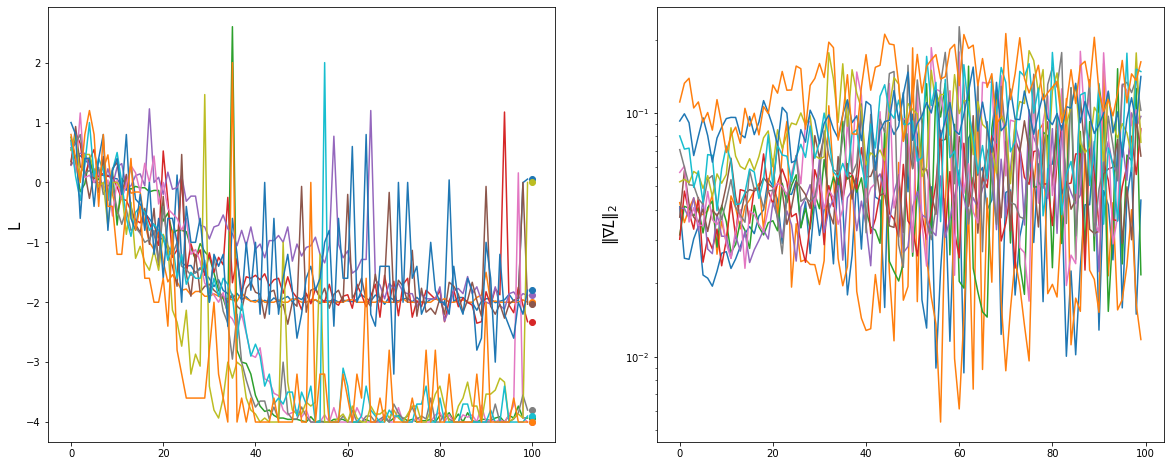

In [45]:
results=[results0[0],results1[0],results2[0],results3[0],results4[0],results5[0],results6[0],results7[0],results8[0],results9[0],results10[0],results11[0]]
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
c = plt.get_cmap('tab10').colors
for i, (lh, gh, ph) in enumerate(results):
    i = i % len(c)
    ax1.plot(lh, color=c[i])
    ax1.plot(len(lh), lh[-1], 'o', color=c[i])
    ax1.set_ylabel('L')
    ax2.plot([jnp.linalg.norm(g) / g.size for g in gh])
    ax2.semilogy()
    ax2.set_ylabel(r'$\Vert \nabla L\Vert_2$')

In [46]:
np.save('total_shotnoise_devicefull.npy',np.array(results))

/var/folders/5f/j9prxj896d77c34qmgsbt8080000gn/T/ipykernel_7529/2754181956.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('total_shotnoise_devicefull.npy',np.array(results))


In [47]:
lossset=[results[k][0] for k in range(12)]

In [48]:
losssetfinal=[np.mean(lossset[k][-3:-1]) for k in range(12)]

In [49]:
losssetfinal

[-0.988,
 -1.98,
 -3.8333333333333335,
 -1.9,
 -1.9,
 -0.9666666666666667,
 -1.88,
 -3.7,
 -3.9000000000000004,
 -4.0,
 -2.1,
 -4.0]